# Activity 4 — Digital Coin Flip and 1D Random Walk

 

This activity guides you to build a small simulation that: (1) flips a fair coin multiple times, (2) summarizes heads/tails counts and percentages, and (3) uses the flips to drive a 1D random walk. You will also optionally visualize the path(s).

 

Deliver a working notebook that meets all requirements below.

## Learning Objectives

- Practice basic simulation using Python’s random number generation.

- Work with simple data structures (lists) and counters.

- Compute descriptive statistics (counts and percentages).

- Implement a 1D random walk derived trials (coin flips).

- Practice clean code organization (helpers/functions), reproducibility via seeds, and optional visualization.



By the end, you should be able to simulate independent coin flips, summarize results, and convert flips into a cumulative walk.

## Background

A fair coin has two outcomes: Heads (H) or Tails (T), each with probability 0.5. If we map H to +1 and T to −1 and keep a running sum, we obtain a simple 1D random walk. Over many steps, the position meanders around zero, with variability increasing with the number of steps.



You will write helper functions to:

- Simulate n coin flips and return the flips plus counts of heads/tails.

- Convert flips into a walk trace (cumulative position starting from 0).

- Optionally run multiple independent simulations and compare outcomes.

## What to Build (Requirements)

Create a clean, runnable notebook that includes:



1) Parameters cell

- total_flips: integer >= 0 (default 100)

- num_simulations: integer >= 1 (default 3)

- base_seed: None or integer (if integer, run i uses base_seed + i)



2) Helper code

- A function to simulate n coin flips: returns a structure with flips (list of 0/1), heads_count, tails_count.

- A function to compute a 1D random walk from flips: starting at 0, +1 for heads, −1 for tails, returns final_position and the entire position trace (list).

- A function to run multiple simulations (num_simulations), using threads or simple loops, returning per-run results.



3) Output for single run

- If num_simulations == 1: print the counts, percentages, and final position. Keep the walk trace available for plotting.



4) Output for multiple runs

- If num_simulations > 1: print summary across persons (average heads, average tails, average final position) and per-person stats. Keep the last run’s details for optional plotting.



5) Optional visualization (bonus)

- Use matplotlib to plot the walk trace for a single run or multiple traces for multiple runs. Handle missing matplotlib gracefully (do not crash if not installed).

## Step-by-Step Instructions

Follow these steps to complete the activity:



1) Parameters

- Create a cell that defines total_flips, num_simulations, and base_seed with sensible defaults. Use try/except NameError to allow re-running without overwriting user changes.



2) Helpers

- Implement simulate_coin_flips(n, seed=None): returns flips (list of ints), heads_count, tails_count; validate n >= 0.

- Implement random_walk_from_flips(flips): returns (final_position, trace). Start position at 0; for each flip: +1 if 1 (heads), −1 if 0 (tails).

- Implement run_simulations(total_flips, num_runs, base_seed=None): for run i, seed = base_seed + i if base_seed is given; collect results. You may use ThreadPoolExecutor or a simple for-loop.



3) Single vs Multiple Runs

- If num_simulations == 1: run once, compute and print a detailed summary (counts and percentages). Print the final position. Keep the (results, final_position, walk_trace) variables for plotting.

- If num_simulations > 1: run num_simulations times, compute averages across runs, and print per-person lines. Keep the last run’s (results, final_position, walk_trace) available for plotting.



4) Optional Plot(s)

- If matplotlib is available: plot walk_trace for single run; for multiple runs, plot each trace labeled by person index and final position. Include a baseline y=0 line.

- Wrap plotting code in try/except to avoid errors if matplotlib is not installed.



5) Reproducibility Checks

- Set base_seed to a fixed integer (e.g., 42), re-run, and confirm that the results are repeatable.

- Change total_flips and/or num_simulations to see how results vary.

## Submission

- Submit your completed notebook named exactly: **Activity4_lastname.ipynb**.

- Ensure all cells run top-to-bottom without errors.

- Include brief comments/docstrings and keep your code organized.

In [11]:
# Define default parameters
total_flips = 100       # Number of coin flips per simulation
num_simulations = 3     # Number of simulation runs
base_seed = None        # Seed for random number generation (None = random)

print(f"Total flips per simulation: {total_flips}")
print(f"Number of simulations (persons): {num_simulations}")
print(f"Base seed: {base_seed}")

Total flips per simulation: 100
Number of simulations (persons): 3
Base seed: None


In [12]:
# Simulation helpers
import random
from typing import List, Tuple, Dict, Any

def simulate_coin_flips(n: int, seed=None) -> Tuple[List[int], int, int]:
    """
    Simulate n coin flips.
    
    Args:
        n: Number of flips to simulate (must be >= 0)
        seed: Random seed for reproducibility
        
    Returns:
        Tuple containing (list of flips, heads count, tails count)
        Each flip is represented as 1 for heads, 0 for tails
    """
    if n < 0:
        raise ValueError("Number of flips must be non-negative")
    
    if seed is not None:
        random.seed(seed)
    
    flips = [random.randint(0, 1) for _ in range(n)]
    heads_count = sum(flips)
    tails_count = n - heads_count
    
    return flips, heads_count, tails_count

def random_walk_from_flips(flips: List[int]) -> Tuple[int, List[int]]:
    """
    Convert coin flips to a 1D random walk.
    
    Args:
        flips: List of coin flips (1=heads, 0=tails)
        
    Returns:
        Tuple of (final position, list of positions)
    """
    position = 0
    trace = [position]  # Start at position 0
    
    for flip in flips:
        # Move +1 for heads (1) or -1 for tails (0)
        position += 1 if flip == 1 else -1
        trace.append(position)
    
    return position, trace

def run_simulations(total_flips: int, num_runs: int, base_seed=None) -> List[Dict[str, Any]]:
    """
    Run multiple coin flip simulations.
    
    Args:
        total_flips: Number of flips per simulation
        num_runs: Number of simulations to run
        base_seed: If provided, run i uses seed = base_seed + i
        
    Returns:
        List of simulation results
    """
    results = []
    
    for i in range(num_runs):
        # Set seed for reproducibility if base_seed is provided
        seed = None if base_seed is None else base_seed + i
        
        # Run simulation
        flips, heads, tails = simulate_coin_flips(total_flips, seed)
        final_position, trace = random_walk_from_flips(flips)
        
        # Store results
        results.append({
            'run': i + 1,
            'flips': flips,
            'heads': heads,
            'tails': tails,
            'heads_pct': heads / total_flips * 100 if total_flips > 0 else 0,
            'tails_pct': tails / total_flips * 100 if total_flips > 0 else 0,
            'final_position': final_position,
            'trace': trace
        })
    
    return results

In [13]:
# Run one or multiple simulations and show summaries
# SAMPLE OUTPUT:

# Run simulations based on parameters
all_results = run_simulations(total_flips, num_simulations, base_seed)

# Process and display results
if num_simulations == 1:
    # Single run - show detailed summary
    result = all_results[0]
    print(f"\nSingle simulation results:")
    print(f"- Heads: {result['heads']} ({result['heads_pct']:.1f}%)")
    print(f"- Tails: {result['tails']} ({result['tails_pct']:.1f}%)")
    print(f"- Final position: {result['final_position']}")
    
    # Keep variables available for plotting
    results = result
    final_position = result['final_position']
    walk_trace = result['trace']
    
else:
    # Multiple runs - calculate averages and show per-run stats
    avg_heads = sum(r['heads'] for r in all_results) / num_simulations
    avg_tails = sum(r['tails'] for r in all_results) / num_simulations
    avg_position = sum(r['final_position'] for r in all_results) / num_simulations
    
    print(f"--- Coin Flip Summary ({num_simulations} persons) ---")
    print(f"Flips per person: {total_flips}")
    print(f"Average Heads: {avg_heads:.2f}")
    print(f"Average Tails: {avg_tails:.2f}")
    print(f"Average Final Position: {avg_position:.2f}")
    print()
    
    for r in all_results:
        print(f"Person {r['run']}: Heads={r['heads']} ({r['heads_pct']:.1f}%), " +
              f"Tails={r['tails']} ({r['tails_pct']:.1f}%), FinalPos={r['final_position']}")
    
    # Keep last run's details available for plotting
    results = all_results[-1]
    final_position = results['final_position']
    walk_trace = results['trace']

--- Coin Flip Summary (3 persons) ---
Flips per person: 100
Average Heads: 54.33
Average Tails: 45.67
Average Final Position: 8.67

Person 1: Heads=55 (55.0%), Tails=45 (45.0%), FinalPos=10
Person 2: Heads=53 (53.0%), Tails=47 (47.0%), FinalPos=6
Person 3: Heads=55 (55.0%), Tails=45 (45.0%), FinalPos=10


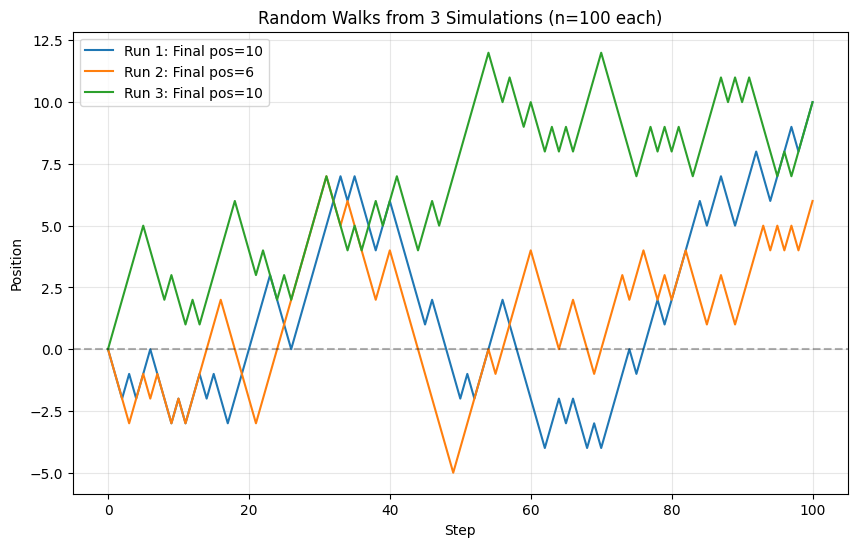

In [14]:
# Visualize the random walk(s) (requires matplotlib)
# SAMPLE OUTPUT:
# Try to import matplotlib and visualize results, handling missing package gracefully
try:
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(10, 6))
    
    if num_simulations == 1:
        # Single simulation visualization
        plt.plot(walk_trace, label=f"Final position: {final_position}")
        plt.title(f"Random Walk from {total_flips} Coin Flips")
    else:
        # Multiple simulations visualization
        for i, result in enumerate(all_results):
            plt.plot(result['trace'], label=f"Run {i+1}: Final pos={result['final_position']}")
        plt.title(f"Random Walks from {num_simulations} Simulations (n={total_flips} each)")
    
    # Add horizontal baseline at y=0
    plt.axhline(y=0, color='k', linestyle='--', alpha=0.3)
    
    plt.xlabel("Step")
    plt.ylabel("Position")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
    
except ImportError:
    print("\nMatplotlib not available. Install with 'pip install matplotlib' to visualize the random walk.")
    print("Final position trace is available in the 'walk_trace' variable.")